In [39]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
import unicodedata

In [40]:
# Para ter melhor print
from IPython.display import display

# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')

print(os.getcwd())

# Carregando os dados do arquivo
dados = pd.read_excel('MICRODADOS_ENEM_ESCOLA_2.xlsx', sheet_name = 'MICRODADOS_ENEM_ESCOLA')

# comando pra ele mostrar todas as colunas e printando tabela
pd.set_option('display.max_columns', None)

Esperamos trabalhar no diretório
c:\Users\jjmar\OneDrive\Área de Trabalho\INSPER\2°Semestre\Ciência dos Dados\Projeto-2---Cdados-Modelo-Preditivo-1\Projeto 2


Target = "NU_MEDIA_MT"

Feautures:\
"TP_DEPENDENCIA_ADM_ESCOLA"\
"NU_TAXA_PARTICIPACAO"\
"NU_TAXA_ABANDONO"\
"NU_TAXA_PARTICIPACAO"\
"PORTE_ESCOLA"

In [41]:
dados.head(10)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,NaN,171,NaN,NaN,NaN,NaN,NaN,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos
5,2008,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,33,NaN,13,NaN,NaN,NaN,NaN,NaN,59.81,42.49,NaN,NaN,NaN,NaN,79.1,17.9,3.0,De 31 a 60 alunos
6,2005,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,25,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.44,NaN,NaN,NaN,69.3,25.0,5.7,De 1 a 30 alunos
7,2005,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,87,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.46,NaN,NaN,NaN,86.5,13.5,0.0,De 61 a 90 alunos
8,2006,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,82,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.73,NaN,NaN,NaN,NaN,NaN,NaN,De 61 a 90 alunos
9,2008,11,RO,1100205,Porto Velho,11000180,INTERAÇÃO - CURSOS E COLÉGIO,4,1,31,NaN,11,NaN,NaN,NaN,NaN,NaN,59.55,45.60,NaN,NaN,NaN,NaN,90.8,9.2,0.0,De 31 a 60 alunos


In [42]:
# Fomatação

pd_dados = pd.DataFrame(dados)

dados_2009 = pd_dados.loc[pd_dados['NU_ANO'] == 2009]

dados_feito = dados_2009[['NU_MEDIA_MT', 'TP_DEPENDENCIA_ADM_ESCOLA', 'NU_TAXA_PARTICIPACAO', 'NU_TAXA_ABANDONO', 'NU_TAXA_APROVACAO', 'PORTE_ESCOLA']]

dados_feito = dados_feito.dropna()

dados_feito = dados_feito.reset_index()

dados_feito = dados_feito.drop(columns = ['index'])

In [43]:
dados_feito.head(5)

,NU_MEDIA_MT,TP_DEPENDENCIA_ADM_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_ABANDONO,NU_TAXA_APROVACAO,PORTE_ESCOLA
0,592.42,4,65.5,0.0,95.5,Maior que 90 alunos
1,467.55,4,50.0,4.7,89.7,De 1 a 30 alunos
2,551.71,4,77.1,0.0,96.3,De 61 a 90 alunos
3,498.91,4,52.2,1.3,91.7,De 61 a 90 alunos
4,570.26,4,60.0,2.3,93.2,De 1 a 30 alunos


In [44]:
#dados_feito.NU_MEDIA_MT

dados_feito.NU_MEDIA_MT.head()

0    592.42
1    467.55
2    551.71
3    498.91
4    570.26
Name: NU_MEDIA_MT, dtype: float64

# **Análise Exploratória!**

## Gráficos de cruzamento entre o Target (NU_MEDIA_MT) e as Features:


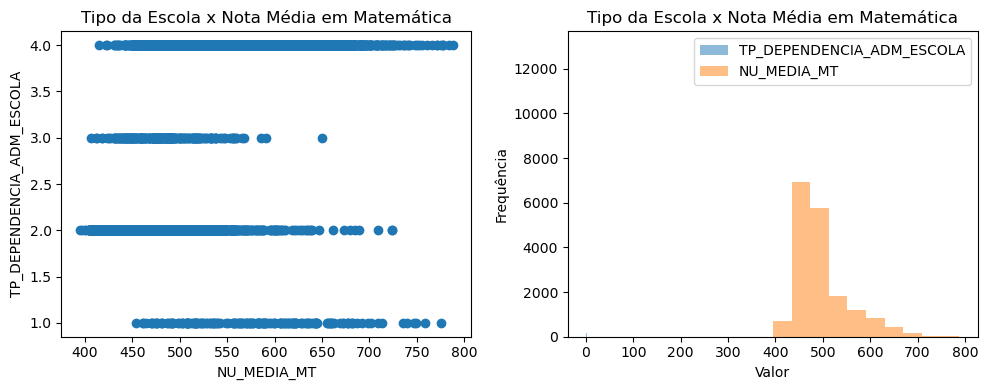

In [45]:
#   NU_MEDIA_MT x TP_DEPENDENCIA_ADM_ESCOLA

# Subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico mostrando as notas segundo seu tipo (1,2,3,4)
axs[0].scatter(dados_feito['NU_MEDIA_MT'], dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'])
axs[0].set_xlabel('NU_MEDIA_MT')
axs[0].set_ylabel('TP_DEPENDENCIA_ADM_ESCOLA')
axs[0].set_title('Tipo da Escola x Nota Média em Matemática')

# Histograma mostrando a frequência das notas
axs[1].hist(dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'], bins=10, alpha=0.5, label='TP_DEPENDENCIA_ADM_ESCOLA')
axs[1].hist(dados_feito['NU_MEDIA_MT'], bins=10, alpha=0.5, label='NU_MEDIA_MT')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Tipo da Escola x Nota Média em Matemática')
axs[1].legend()

plt.tight_layout()

plt.show()

Explicação/Interpretação do gráfico:

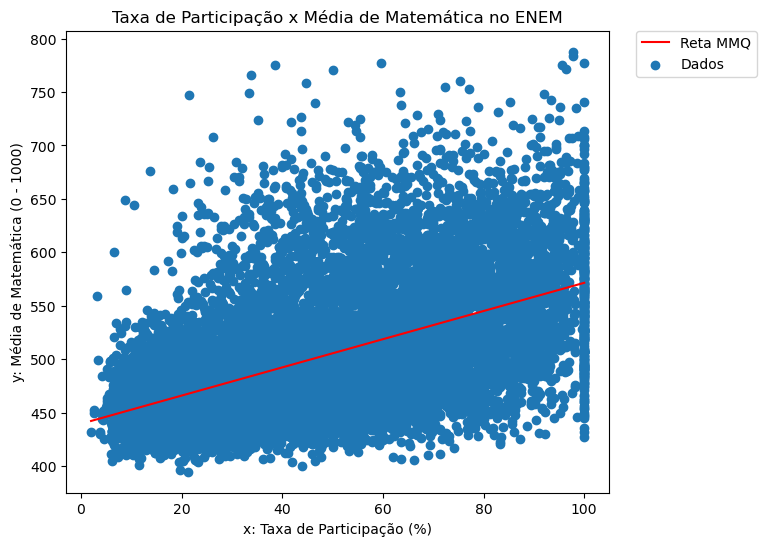

In [46]:
#       NU_MEDIA_MT x NU_TAXA_PARTICIPACAO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_PARTICIPACAO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_PARTICIPACAO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_PARTICIPACAO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_PARTICIPACAO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_PARTICIPACAO'].min(), dados_feito['NU_TAXA_PARTICIPACAO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico novamente:
plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: Taxa de Participação (%)")
plt.ylabel("y: Média de Matemática (0 - 1000)")
plt.legend(('Reta MMQ','Dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.title('Taxa de Participação x Média de Matemática no ENEM')
plt.show()

EXPLICAÇÃO: (Apagar isso dps, esse gráfico não está levando em considerção o tipo da escola, somente a média em sua forma mais pura.)

In [ ]:
#   NU_MEDIA_MT x NU_TAXA_ABANDONO

EXPLICAÇÃO

In [ ]:
#   NU_MEDIA_MT x NU_TAXA_APROVACAO

EXPLICAÇÃO

In [ ]:
#   NU_MEDIA_MT x PORTE_ESCOLA

EXPLICAÇÃO